In [1]:
# --------------------- EDA Rooftop Solar Potential of Dominica ----------------------

In [2]:
# --------------------- import necessary library ----------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# --------------------- Load datasets ----------------------
df = pd.read_csv("../original_datasets/dominica_rooftop_solar_potential.csv")

print("Initial Shape:", df.shape)
print("Columns:", df.columns.tolist())

Initial Shape: (37841, 15)
Columns: ['OBJECTID', 'uuid', 'City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Unit_installation_price', 'Comment', 'Date_added', 'aoi']


In [4]:
df.isna().sum()

OBJECTID                          0
uuid                              0
City                              0
Surface_area                      0
Potential_installable_area        0
Peak_installable_capacity         0
Energy_potential_per_year         0
Assumed_building_type             0
Estimated_tilt                    0
Estimated_building_height      3846
Estimated_capacity_factor       645
Unit_installation_price       37841
Comment                       37009
Date_added                        0
aoi                               0
dtype: int64

In [5]:
#--------------------- Drop Unecessary columns --------------------------
df.drop(['aoi','OBJECTID','uuid', 'Comment','Unit_installation_price','Date_added'] , axis=1, inplace=True)

In [6]:
# --------------------- columns after drop  ----------------------
print("Columns:", df.columns.tolist())
print(df.shape)

Columns: ['City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor']
(37841, 9)


In [7]:
# ------------------ Missing value ----------------------
df.isna().sum()


City                             0
Surface_area                     0
Potential_installable_area       0
Peak_installable_capacity        0
Energy_potential_per_year        0
Assumed_building_type            0
Estimated_tilt                   0
Estimated_building_height     3846
Estimated_capacity_factor      645
dtype: int64

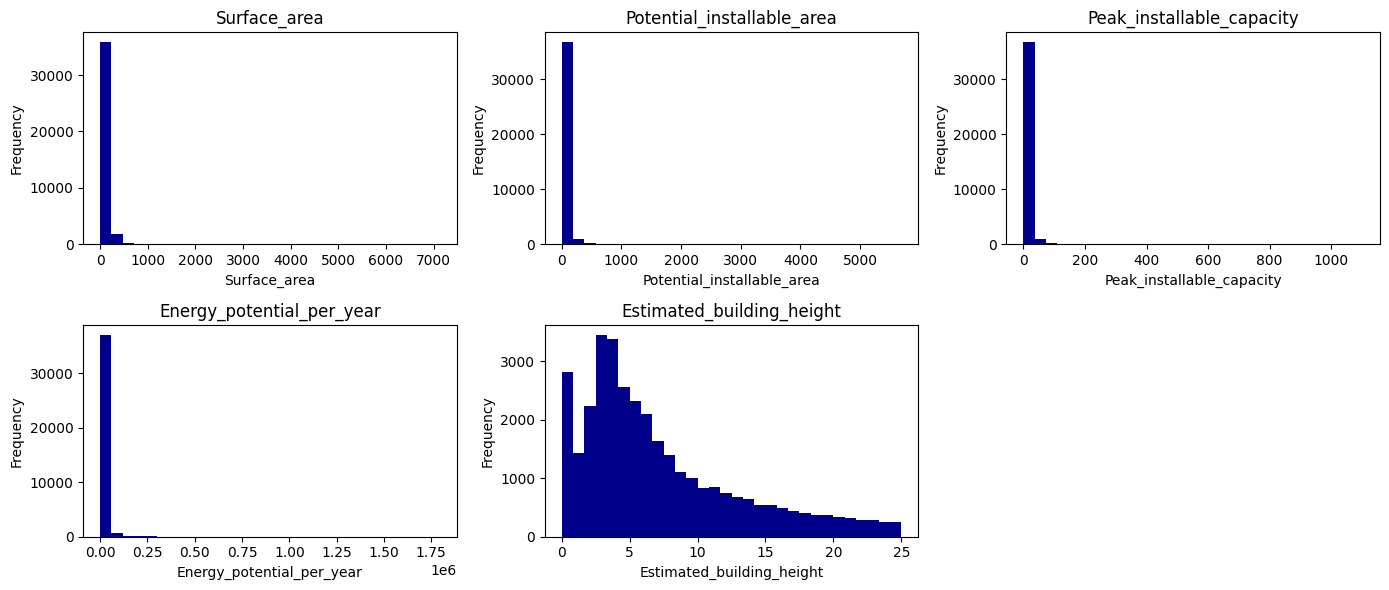

In [8]:
#-------------------- Distribution of necessary columns -------------------------------
cols = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year',
    'Estimated_building_height'
]

fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].plot(ax=axes[i], kind='hist', bins=30, color='darkblue', title=col)
    axes[i].set_xlabel(col)
    

# Hide the unused subplot (since you have 5 columns)
axes[-1].axis('off')

plt.tight_layout()
plt.show()

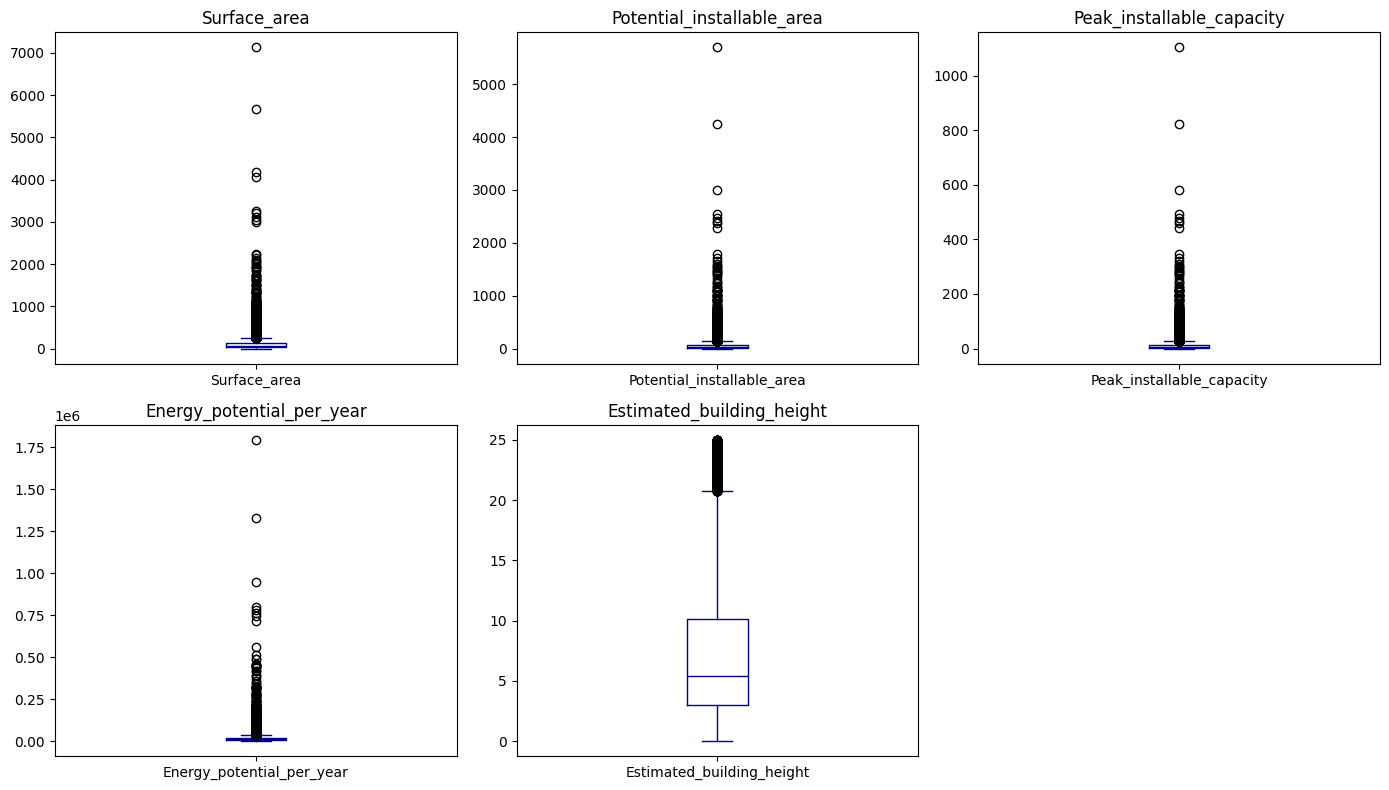

In [9]:
#-------------------- Boxplot of necessary columns to see outliers -------------------------------
cols = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year',
    'Estimated_building_height'
]

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].plot(ax=axes[i], kind='box', color='darkblue', title=col)
 
    

# Hide the unused subplot (since you have 5 columns)
axes[-1].axis('off')

plt.tight_layout()
plt.show()

In [10]:
(df == 0).sum()
#This means that eventhough there is surface_area but the potential installable area is 0. Then the surface couldn't be installed.

City                            0
Surface_area                    0
Potential_installable_area    645
Peak_installable_capacity     645
Energy_potential_per_year     645
Assumed_building_type           0
Estimated_tilt                573
Estimated_building_height       0
Estimated_capacity_factor       0
dtype: int64

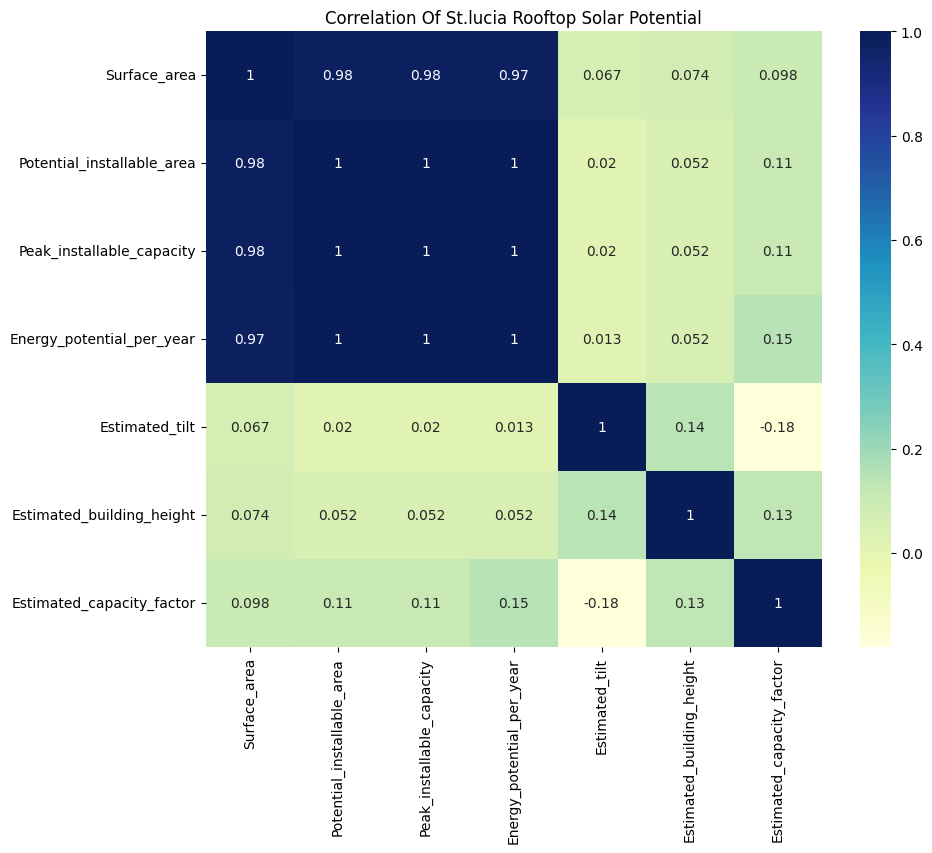

In [11]:
# --------------------- Correlation Heatmap of all the columns that contains zero----------------------
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', square=True)
plt.title("Correlation Of St.lucia Rooftop Solar Potential")
plt.show()

In [12]:
#Let's see why the value of Peak_installable_capacity and Energy_potential_per_year has correlation 1
df[df['Peak_installable_capacity'] == df['Energy_potential_per_year']]

,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
132,Dominica,25.370001,0.0,0.0,0.0,Single-family residential,24.160000,12.50,NaN
227,Dominica,24.340000,0.0,0.0,0.0,Single-family residential,27.440001,1.92,NaN
284,Dominica,26.379999,0.0,0.0,0.0,Single-family residential,35.860001,13.75,NaN
315,Dominica,28.379999,0.0,0.0,0.0,Single-family residential,23.309999,11.74,NaN
341,Dominica,11.390000,0.0,0.0,0.0,Single-family residential,36.490002,4.94,NaN
...,...,...,...,...,...,...,...,...,...
37466,Dominica,34.759998,0.0,0.0,0.0,Single-family residential,14.250000,0.19,NaN
37525,Dominica,17.340000,0.0,0.0,0.0,Single-family residential,13.850000,15.62,NaN
37563,Dominica,17.410000,0.0,0.0,0.0,Single-family residential,34.500000,2.18,NaN
37629,Dominica,17.150000,0.0,0.0,0.0,Single-family residential,11.660000,0.10,NaN


In [13]:

df = df.loc[(df != 0).all(axis=1)]

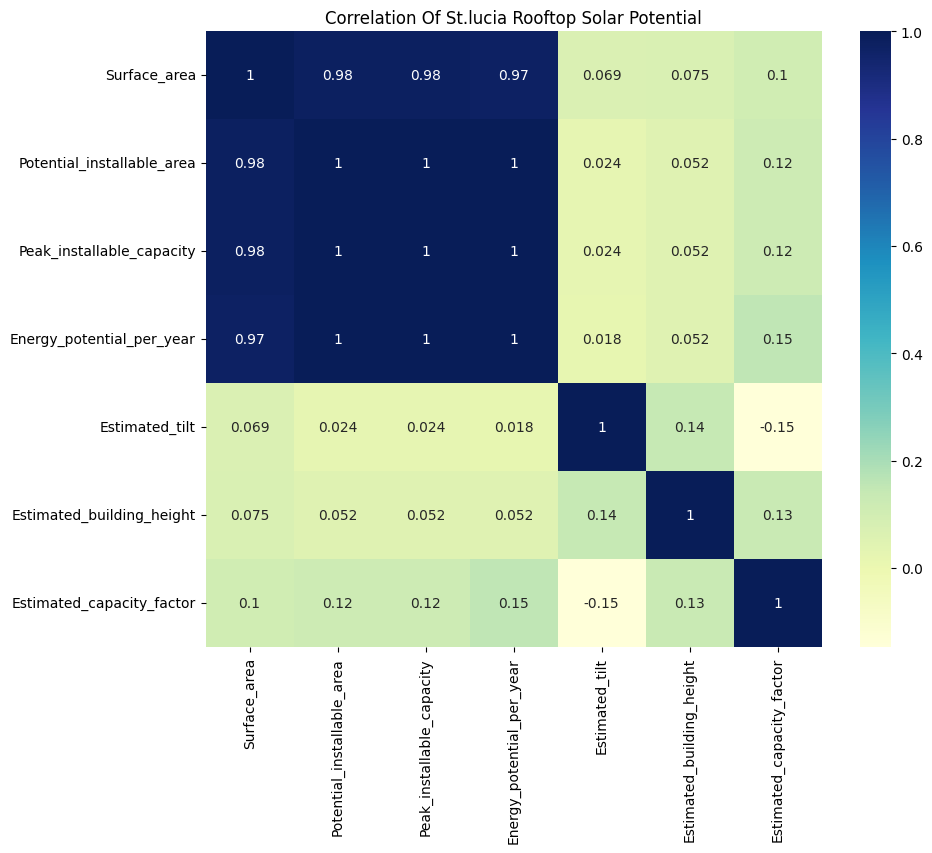

In [14]:
# --------------------- Correlation Heatmap of all the columns remove all the zero----------------------
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', square=True)
plt.title("Correlation Of St.lucia Rooftop Solar Potential")
plt.show()